## DECISION TREE

A decision tree represents the potential consequences of a number of connected decisions. They can be used to lay out an algorithm that calculates the optimal option. A decision tree is formally a graphical representation of every potential course of action. They have excellent versatility and are simpler to understand and visualize. Tree-based algorithms can be used for classification and regression issues, however they are typically employed for classification problems.

### Decision tree classifier for twitter data

Using the hashtags "climatechange" and "savetheplanet," Twitter data is gathered to determine people's opinions on how climate change is affecting the planet. The objective is to use decision trees to train the model to categorize tweets according to these hashtags.

Import required libraries

In [103]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

After collecting the data, pre-processing was carried-out for enhancing the quality of collected data. Lemmatization, the removal of stop words, lowercase conversion, and the stemming process were carried out to complete the twitter pre-processing. 

Lemmatization: It transforms the words of a sentence into dictionary form.

Reading the clean and combined data: 

In [104]:
df = pd.read_csv('../../data/combined_data.csv')
df['final_tweets'] = df['final_tweets'].str.replace('rt', '')
df.head()

,label,final_tweets
0,savetheplanet,scallynancy think bringing recordbreaking supp...
1,savetheplanet,luluonti agroecology agroecologia organicfarm...
2,savetheplanet,aliceyadavis digital livestock weaken defores...
3,savetheplanet,elagoradiario el cambioclimático e una realid...
4,savetheplanet,agroecology agroecologia organicfarming organi...


The number of values in each class is counted, and the graph is plotted based on the number of tweets in each class. The model was downsized, the labels were normalized, and it was fit into decision trees.

Text(0, 0.5, 'Frequency')

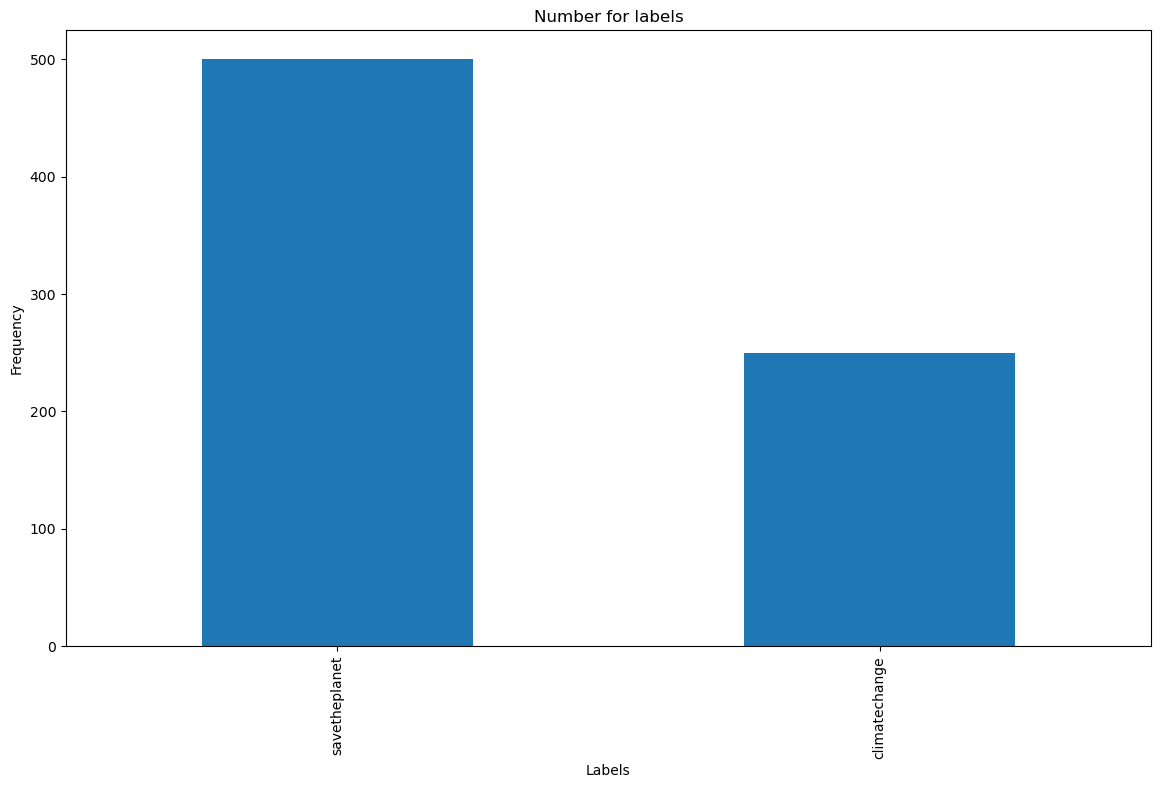

In [105]:
#checking for number of vlues in each class
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

In [106]:
# Separate majority and minority classes
df_majority = df[df.label=='savetheplanet']
df_minority = df[df.label=='climatechange']

In [107]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

In [108]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [109]:
# Display new class counts
df_downsampled.label.value_counts()

savetheplanet    250
climatechange    250
Name: label, dtype: int64

In [110]:
X=df_downsampled['final_tweets'].values
y=df_downsampled['label'].values

In [111]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Splitting Data into Training and Testing Data in Sklearn:
By splitting our dataset into training and testing data, we can reserve some data to verify our model’s effectiveness. We do this split before we build our model in order to test the effectiveness against data that our model hasn’t yet seen.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [113]:
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train.astype('U')) 
X_test1 = vectorizer.transform(X_test.astype('U'))

In [114]:
#AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(X_train))
print(X_train.shape)
print(type(y_train))
print(y_train.shape)
print(type(X_test))
print(X_test.shape)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(375,)
<class 'numpy.ndarray'>
(375,)
<class 'numpy.ndarray'>
(125,)
<class 'numpy.ndarray'>
(125,)


### Decision tree classifier

Decision tree classifiers are used in a wide range of applications. The ability to extract descriptive decisionmaking knowledge from provided data is their most important feature. Training sets can be used to generate decision trees. 
The performance of a decision tree classifier is determined by how well the tree is built from training data. A decision tree typically begins with a root node and then divides the source set into subsets based on a feature value to generate subtrees. This process is repeated recursively on each derived subset until leaf nodes are created.

In [115]:
#TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train1, y_train)


DecisionTreeClassifier(max_depth=5)

In [116]:
#USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = clf.predict(X_train1)
yp_test = clf.predict(X_test1)

Evaluating the model using confusion matrix.

In [117]:
from sklearn.metrics import confusion_matrix

def confusion_plot(y_data,y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label=0)))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label=0)))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label=1)))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label=1)))
    print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


For the training model, the model achieves 91% accuracy with 85% negative precision and 100% positive precision. And the predicted test data is 95% accurate, with 91% negative precision and 100% positive precision.

------TRAINING------
ACCURACY: 0.91
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.85
POSITIVE RECALL (Y=1): 0.82
POSITIVE PRECISION (Y=1): 1.00
[[188   0]
 [ 34 153]]


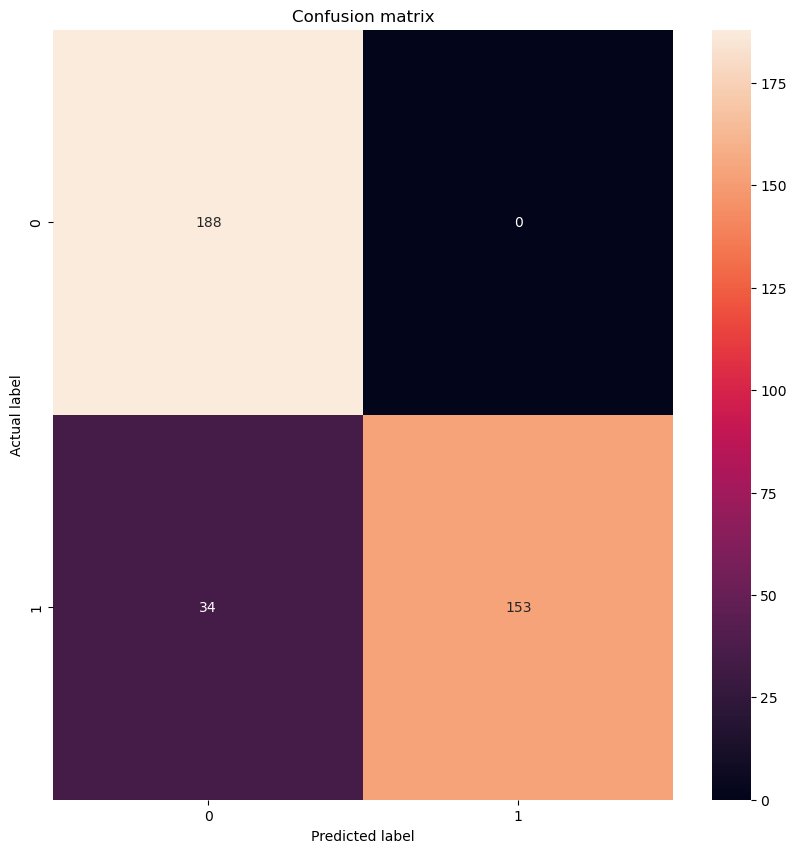

------TEST------
ACCURACY: 0.95
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.91
POSITIVE RECALL (Y=1): 0.90
POSITIVE PRECISION (Y=1): 1.00
[[62  0]
 [ 6 57]]


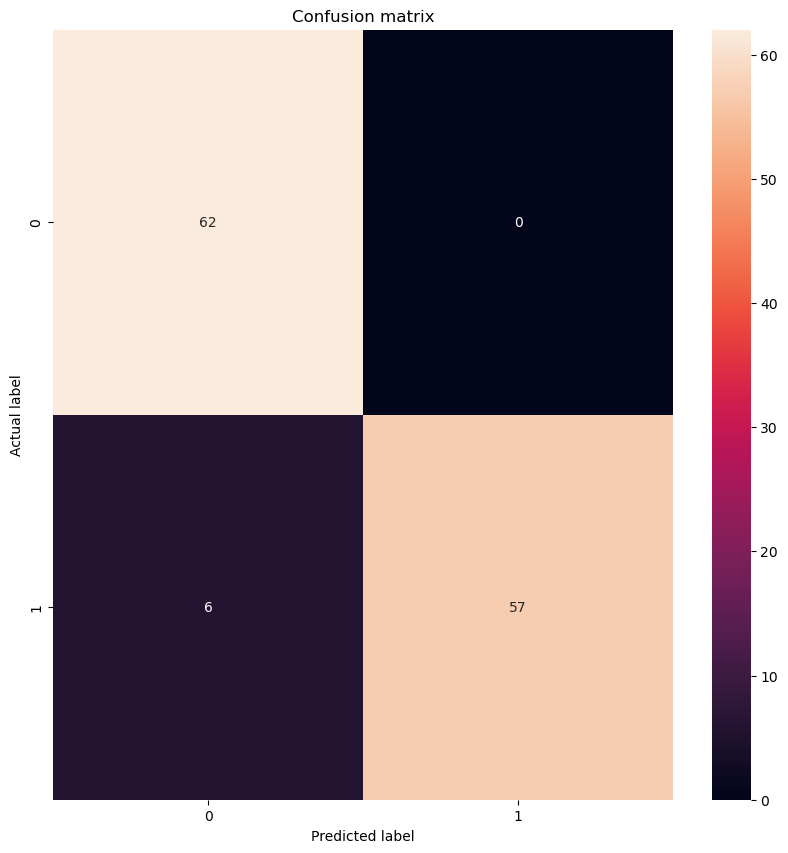

In [118]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

### Visualizing the tree

[Text(0.6538461538461539, 0.9166666666666666, 'savetheplanet <= 0.5\ngini = 0.5\nsamples = 375\nvalue = [188, 187]\nclass = savetheplanet'),
 Text(0.46153846153846156, 0.75, 'climatechange <= 0.5\ngini = 0.344\nsamples = 240\nvalue = [187, 53]\nclass = savetheplanet'),
 Text(0.3076923076923077, 0.5833333333333334, 'ecija <= 0.5\ngini = 0.483\nsamples = 125\nvalue = [74, 51]\nclass = savetheplanet'),
 Text(0.23076923076923078, 0.4166666666666667, 'thevegandrakon <= 0.5\ngini = 0.5\nsamples = 101\nvalue = [50, 51]\nclass = climatechange'),
 Text(0.15384615384615385, 0.25, 'dont <= 0.5\ngini = 0.494\nsamples = 90\nvalue = [50, 40]\nclass = savetheplanet'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.482\nsamples = 84\nvalue = [50, 34]\nclass = savetheplanet'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = climatechange'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = climatechange'),
 T

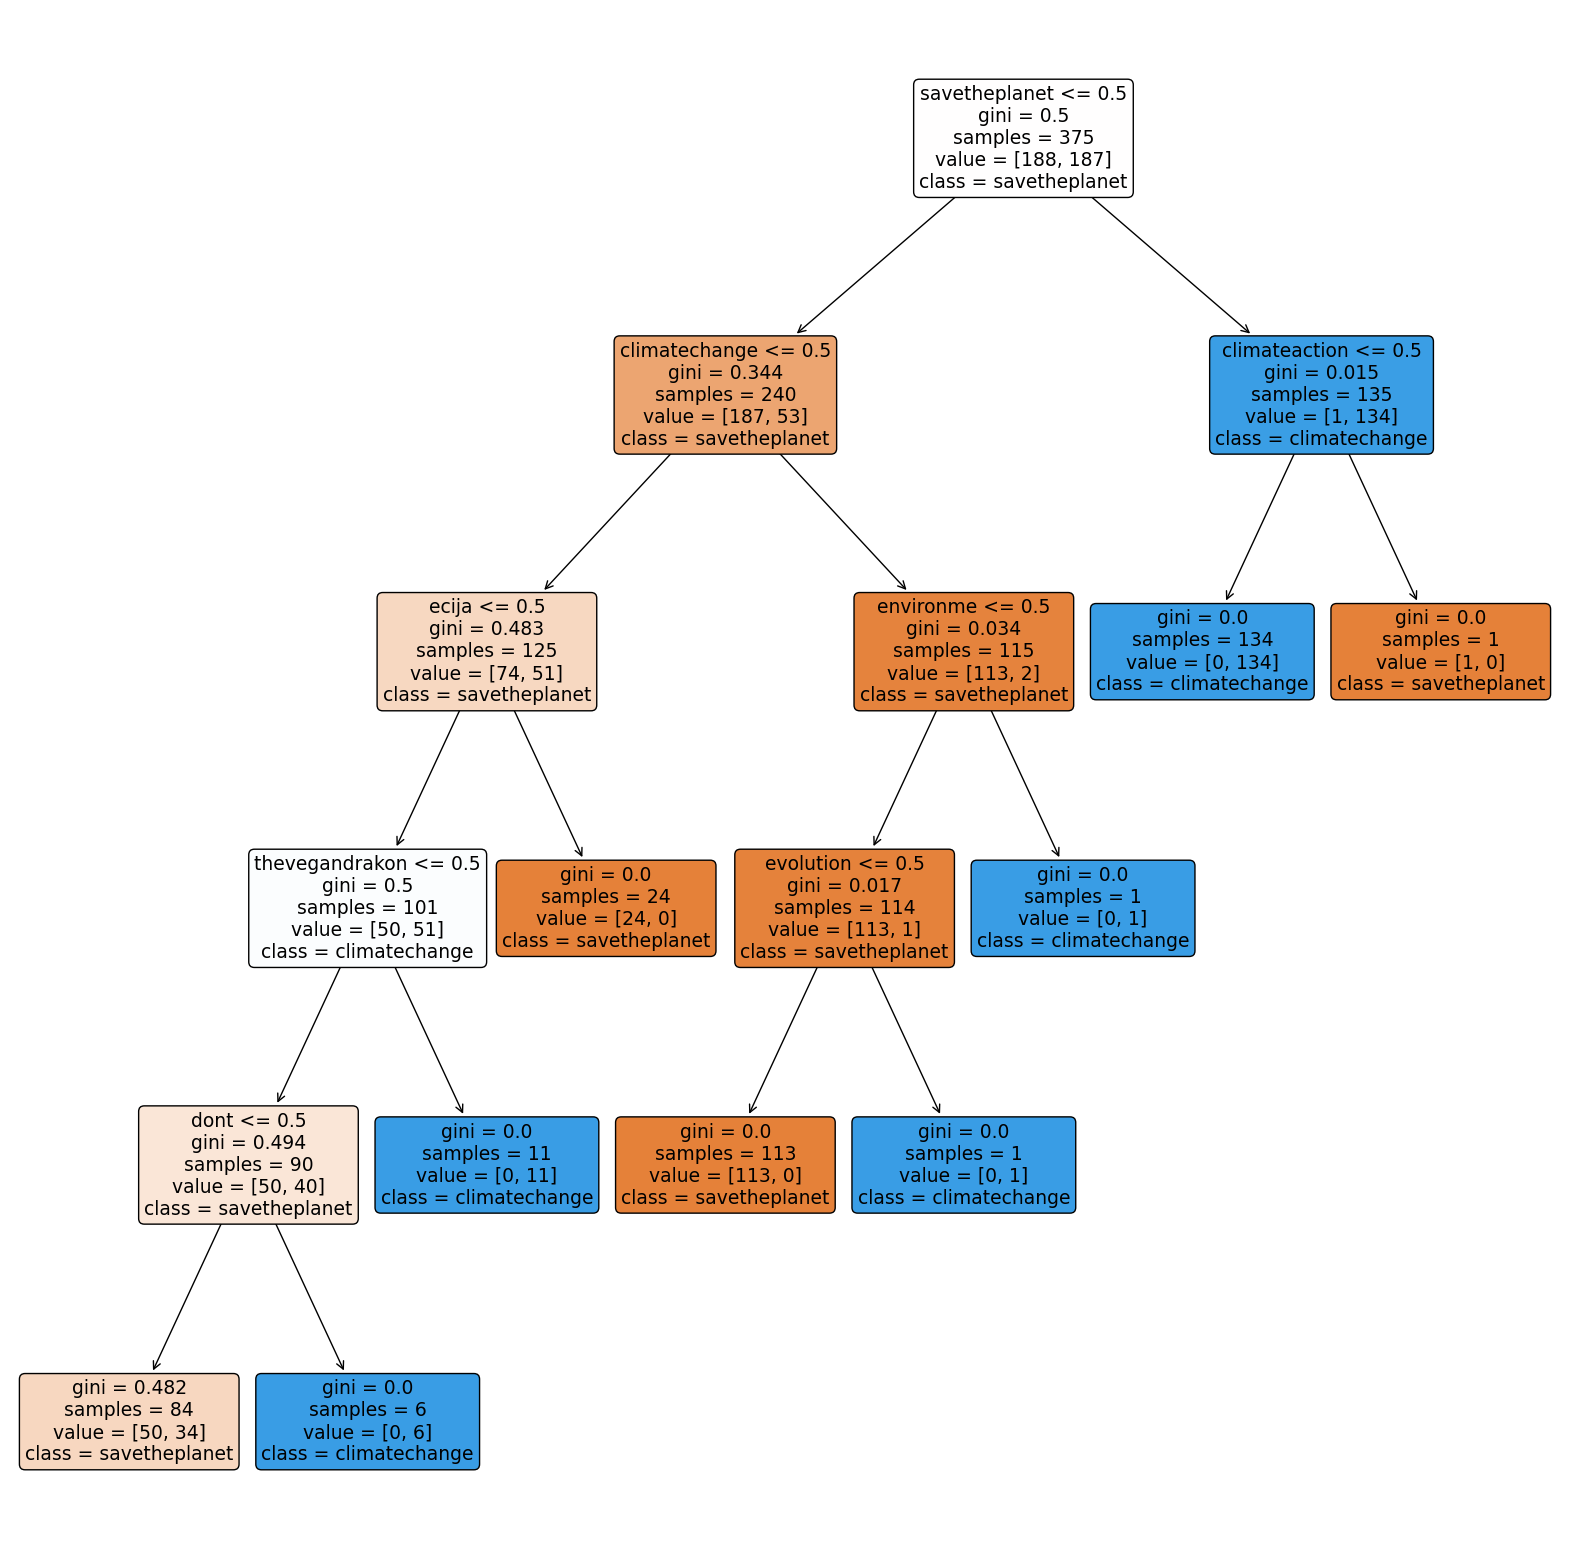

In [119]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, rounded=True, class_names=['savetheplanet','climatechange'], feature_names=vectorizer.get_feature_names_out())

### Hyper-parameter turning

The "max_depth" hyper-parameter lets us control the number of layers in our tree.
Iterating over "max_depth"  to find the set of hyper-parameters with the lowest training AND test error.

In [120]:

test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train1, y_train)

    yp_train=model.predict(X_train1)
    yp_test=model.predict(X_test1)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])


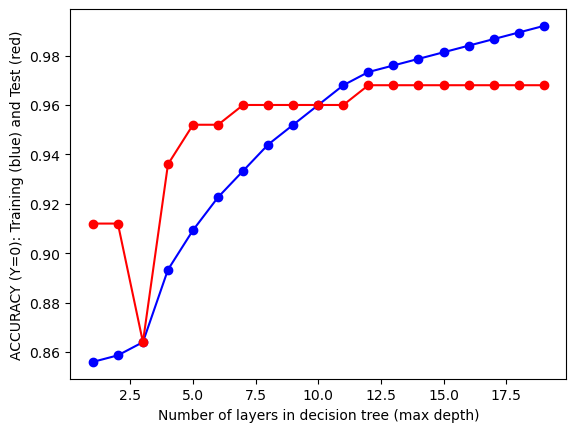

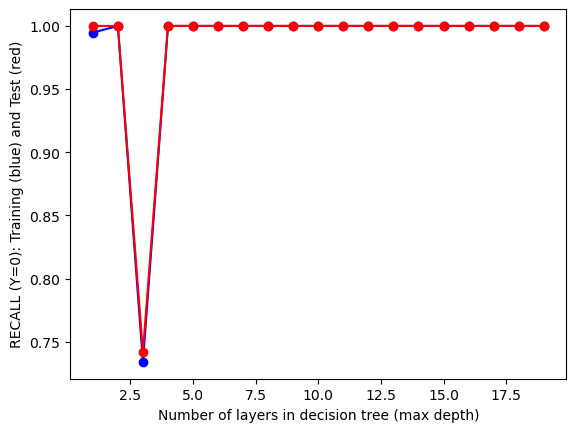

Text(0.5, 0, 'Number of layers in decision tree (max depth)')

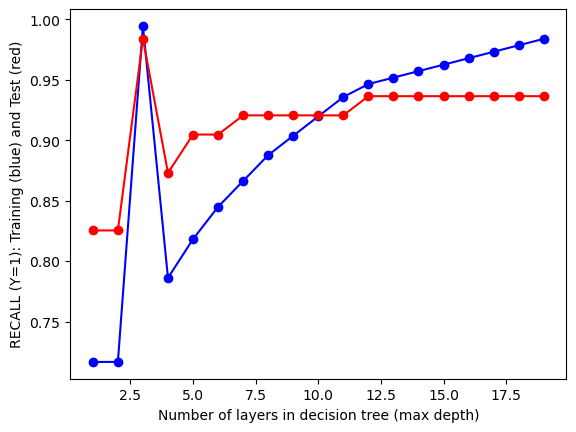

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# PLOT 1: ACCURACY SCORE
line1, = plt.plot(pd.DataFrame(train_results)[0], pd.DataFrame(train_results)[1], 'b', label="Train Accuracy", marker='o')
line2, = plt.plot(pd.DataFrame(test_results)[0], pd.DataFrame(test_results)[1], 'r', label="Test Accuracy", marker='o')

plt.ylabel("ACCURACY (Y=0): Training (blue) and Test (red)")
plt.xlabel('Number of layers in decision tree (max depth)')
plt.show()


# PLOT 2: RECALL SCORE (Y=0)
line1, = plt.plot(pd.DataFrame(train_results)[0], pd.DataFrame(train_results)[2], 'b', label="Train Recall", marker='o')
line2, = plt.plot(pd.DataFrame(test_results)[0], pd.DataFrame(test_results)[2], 'r', label="Test Recall", marker='o')
plt.ylabel("RECALL (Y=0): Training (blue) and Test (red)")
plt.xlabel('Number of layers in decision tree (max depth)')
plt.show()

# PLOT 3:ACCURACY SCORE FOR CLASS 1
line1, = plt.plot(pd.DataFrame(train_results)[0], pd.DataFrame(train_results)[3], 'b', label="Train Recall", marker='o')
line2, = plt.plot(pd.DataFrame(test_results)[0], pd.DataFrame(test_results)[3], 'r', label="Test Recall", marker='o')
plt.ylabel("RECALL (Y=1): Training (blue) and Test (red)")
plt.xlabel('Number of layers in decision tree (max depth)')



- As the depth increases, so do the accuracy and recall scores.
- At max depth = 12, the accuracy and recall scores of test data are at their highest.
- The accuracy and recall scores of train data continue to improve as the depth increases.
Based on the information in the graphs above, the optimal tree has a maximum depth of 12.


After choosing the optimal tree depth, the training model, the model achieves 97% accuracy with 95% negative precision and 100% positive precision. And the predicted test data is 97% accurate, with 94% negative precision and 100% positive precision.

In [122]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=12)
model = model.fit(X_train1, y_train)

yp_train=model.predict(X_train1)
yp_test=model.predict(X_test1)

------TRAINING------
ACCURACY: 0.97
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.95
POSITIVE RECALL (Y=1): 0.95
POSITIVE PRECISION (Y=1): 1.00
[[188   0]
 [ 10 177]]


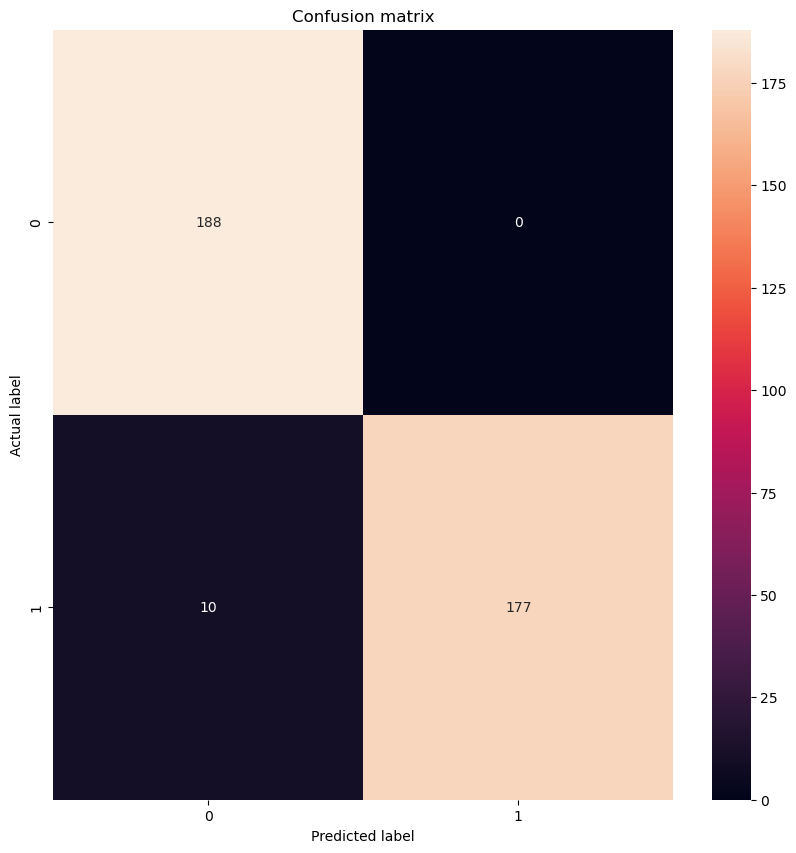

------TEST------
ACCURACY: 0.97
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.94
POSITIVE RECALL (Y=1): 0.94
POSITIVE PRECISION (Y=1): 1.00
[[62  0]
 [ 4 59]]


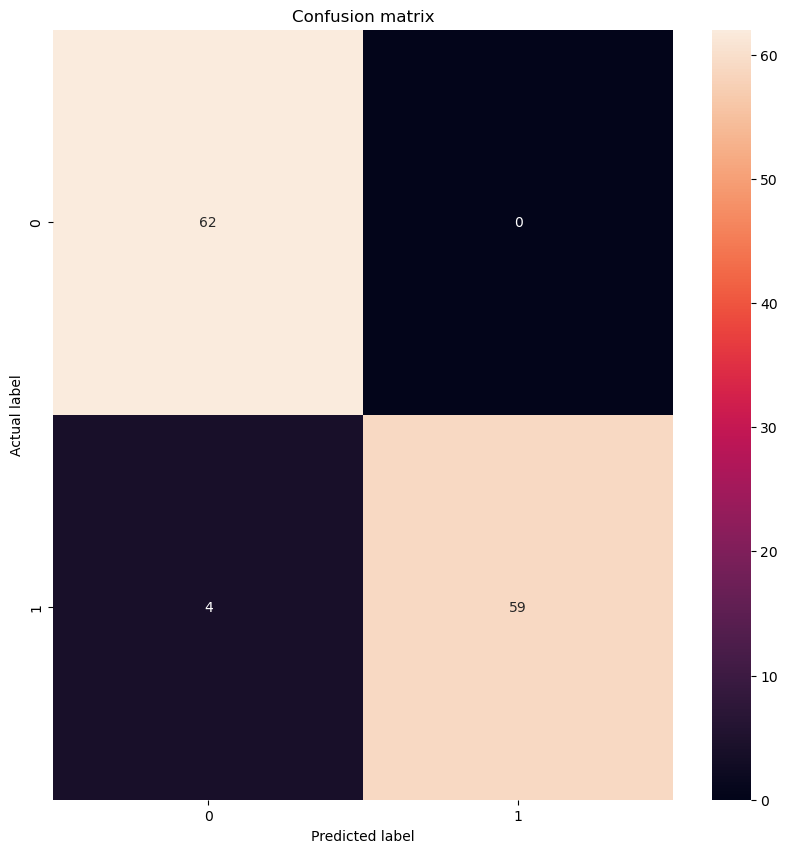

In [123]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

Visualizing the optimal tree

[Text(0.775, 0.9615384615384616, 'savetheplanet <= 0.5\ngini = 0.5\nsamples = 375\nvalue = [188, 187]\nclass = savetheplanet'),
 Text(0.65, 0.8846153846153846, 'climatechange <= 0.5\ngini = 0.344\nsamples = 240\nvalue = [187, 53]\nclass = savetheplanet'),
 Text(0.55, 0.8076923076923077, 'showing <= 0.5\ngini = 0.483\nsamples = 125\nvalue = [74, 51]\nclass = savetheplanet'),
 Text(0.5, 0.7307692307692307, 'mentoo <= 0.5\ngini = 0.5\nsamples = 101\nvalue = [50, 51]\nclass = climatechange'),
 Text(0.45, 0.6538461538461539, 'dont <= 0.5\ngini = 0.494\nsamples = 90\nvalue = [50, 40]\nclass = savetheplanet'),
 Text(0.4, 0.5769230769230769, 'sustainability <= 0.5\ngini = 0.482\nsamples = 84\nvalue = [50, 34]\nclass = savetheplanet'),
 Text(0.35, 0.5, 'company <= 0.5\ngini = 0.465\nsamples = 79\nvalue = [50, 29]\nclass = savetheplanet'),
 Text(0.3, 0.4230769230769231, 'nicochan <= 0.5\ngini = 0.444\nsamples = 75\nvalue = [50, 25]\nclass = savetheplanet'),
 Text(0.25, 0.34615384615384615, 'elag

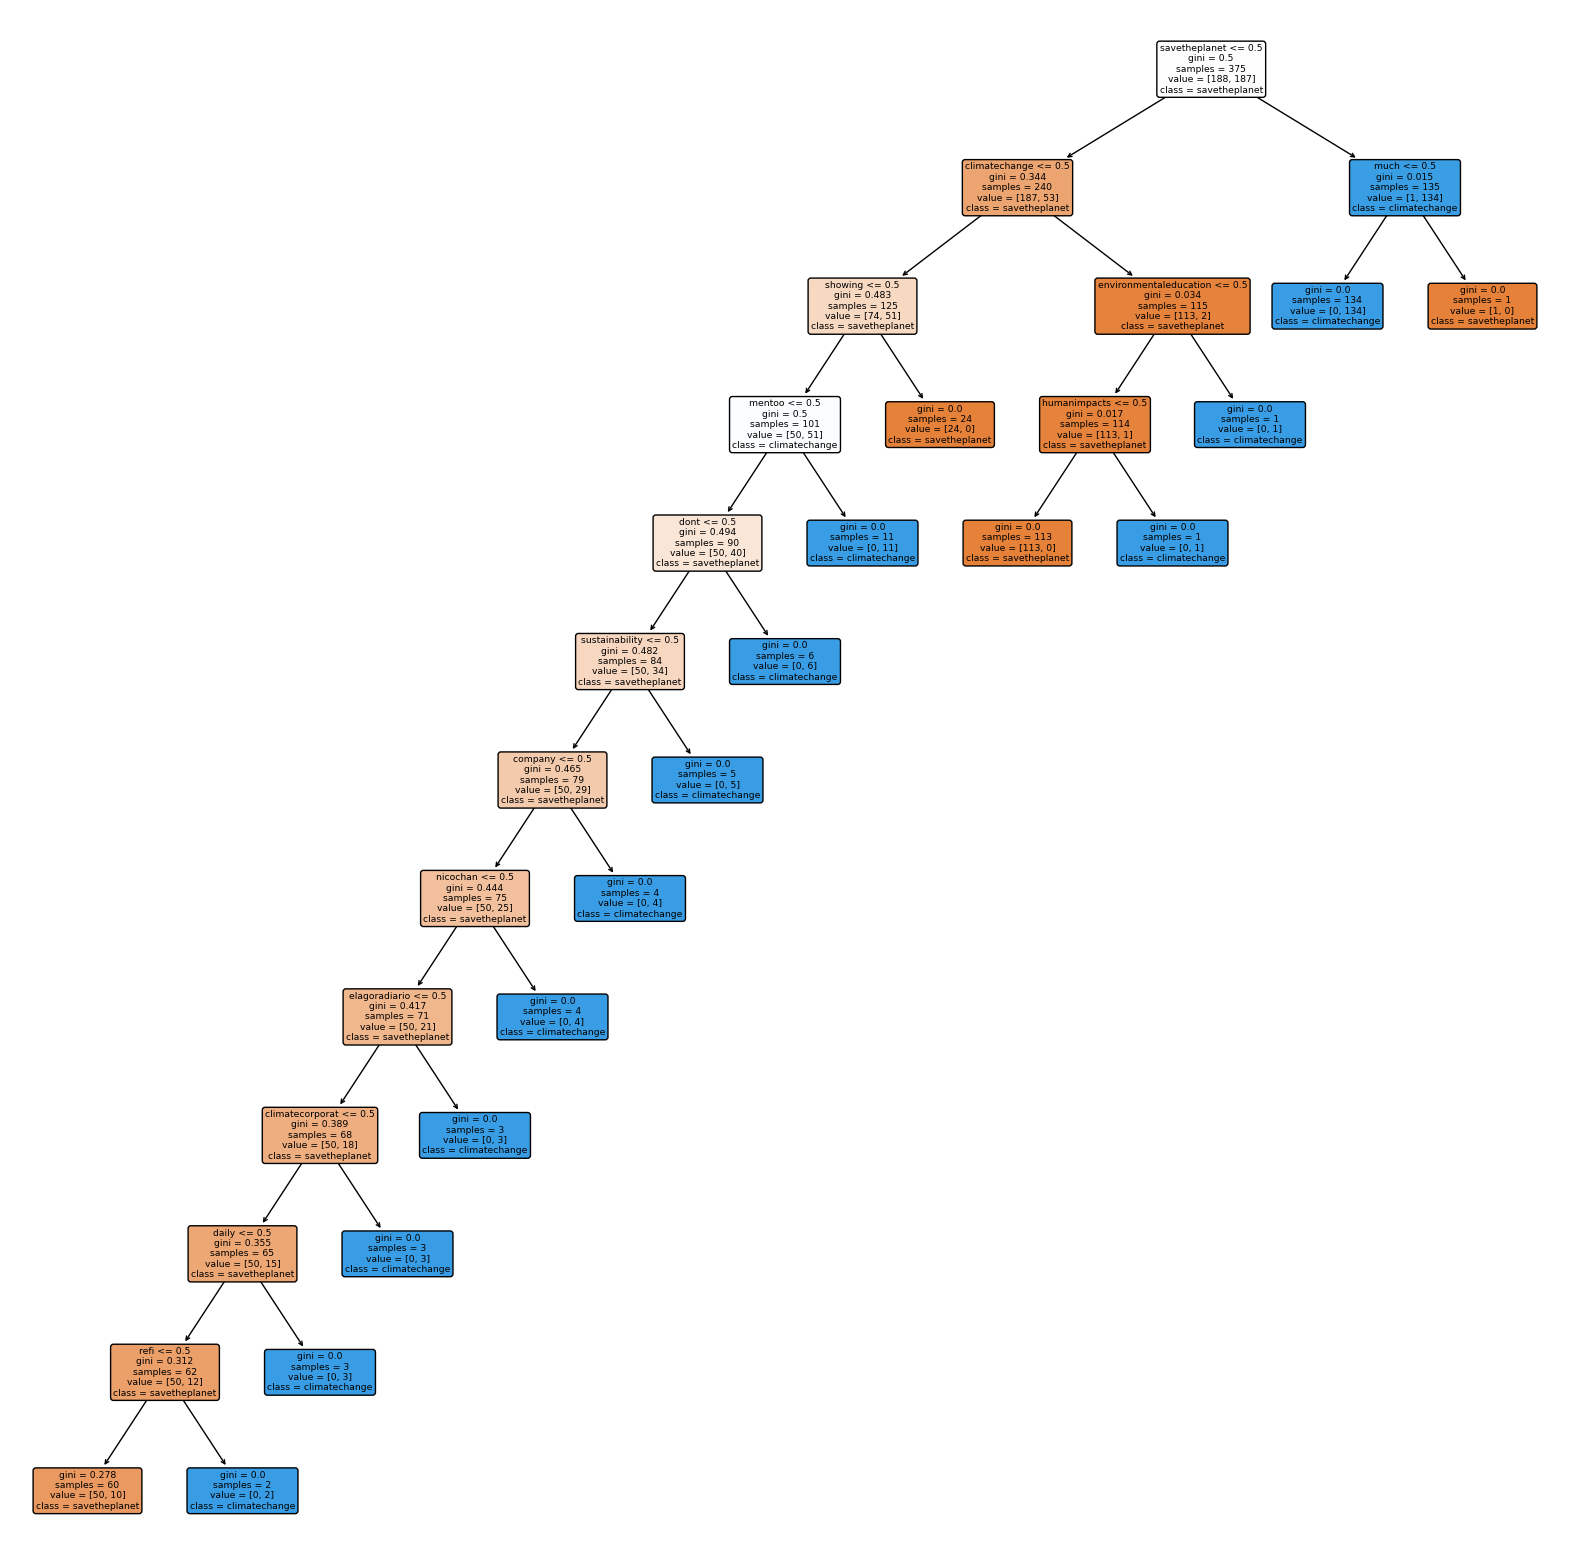

In [124]:
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, rounded=True, class_names=['savetheplanet','climatechange'], feature_names=vectorizer.get_feature_names_out())

### Conclusion:
The model is yielding about 97% accuracy after choosing the optimal max-depth for the tree. 
